In [2]:

import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold 


In [3]:
from sklearn import preprocessing
train1 = pd.read_csv(r'E:\project\FINAL\features.csv')
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1,y,random_state=0,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(276, 73)
(276,)
(119, 73)
(119,)


In [6]:
model=XGBClassifier(learning_rate=0.1,n_estimators=100)

model.fit(X_train,Y_train)

XGBClassifier(objective='multi:softprob')

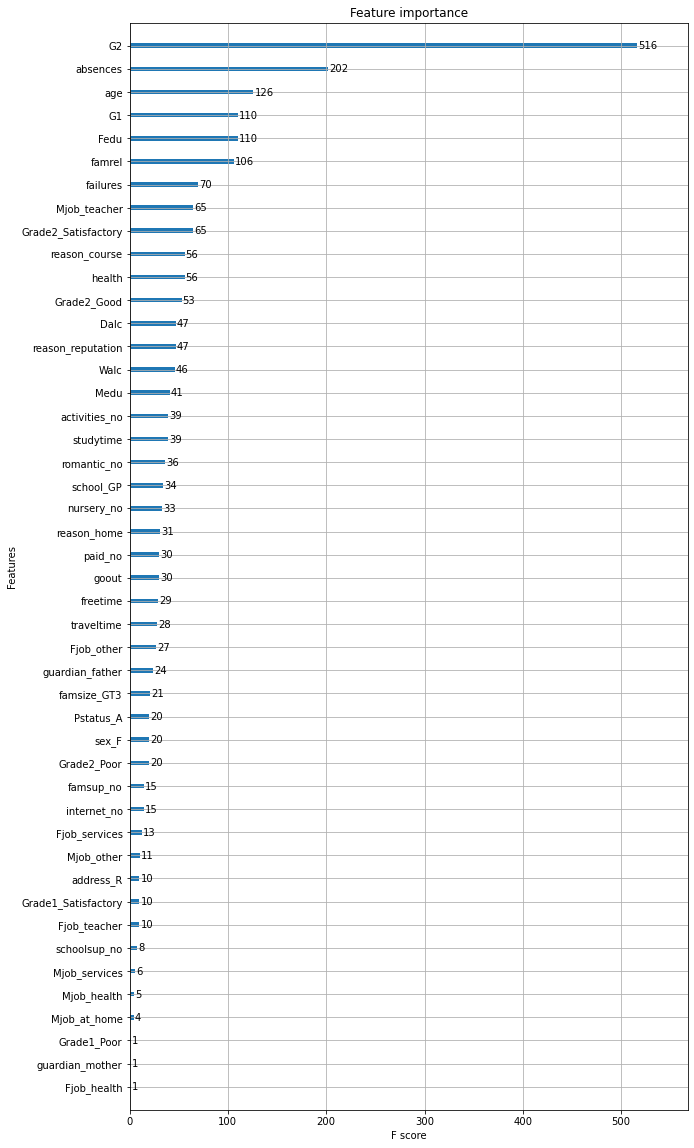

In [7]:
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

plt.show()

In [8]:
score = model.score(X_test, Y_test)

In [9]:
score


0.8151260504201681